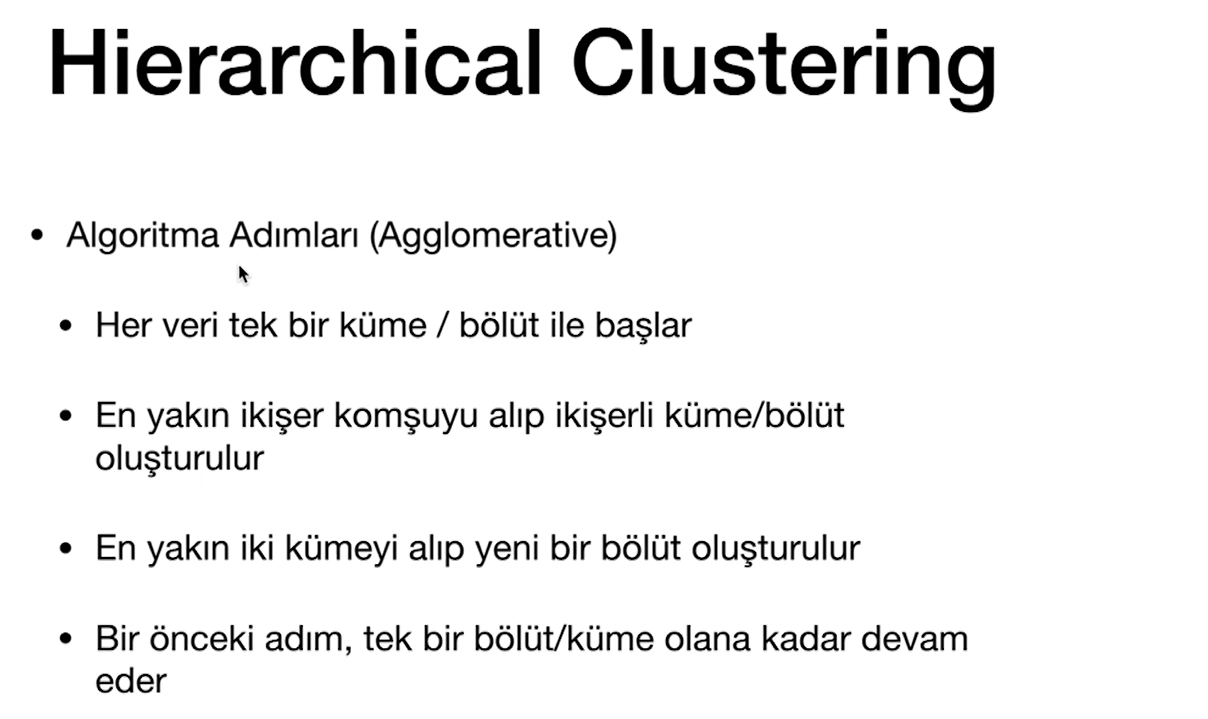
# agglomerative ve divisive ters işlemleri yapan kavramlar
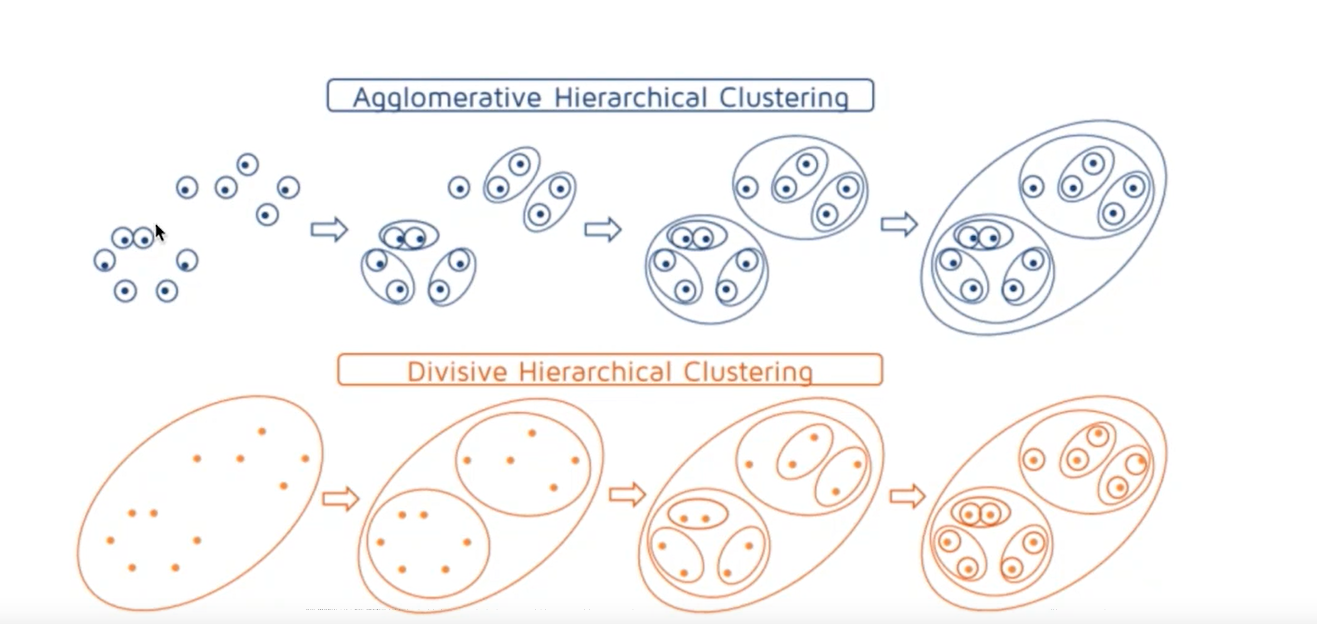
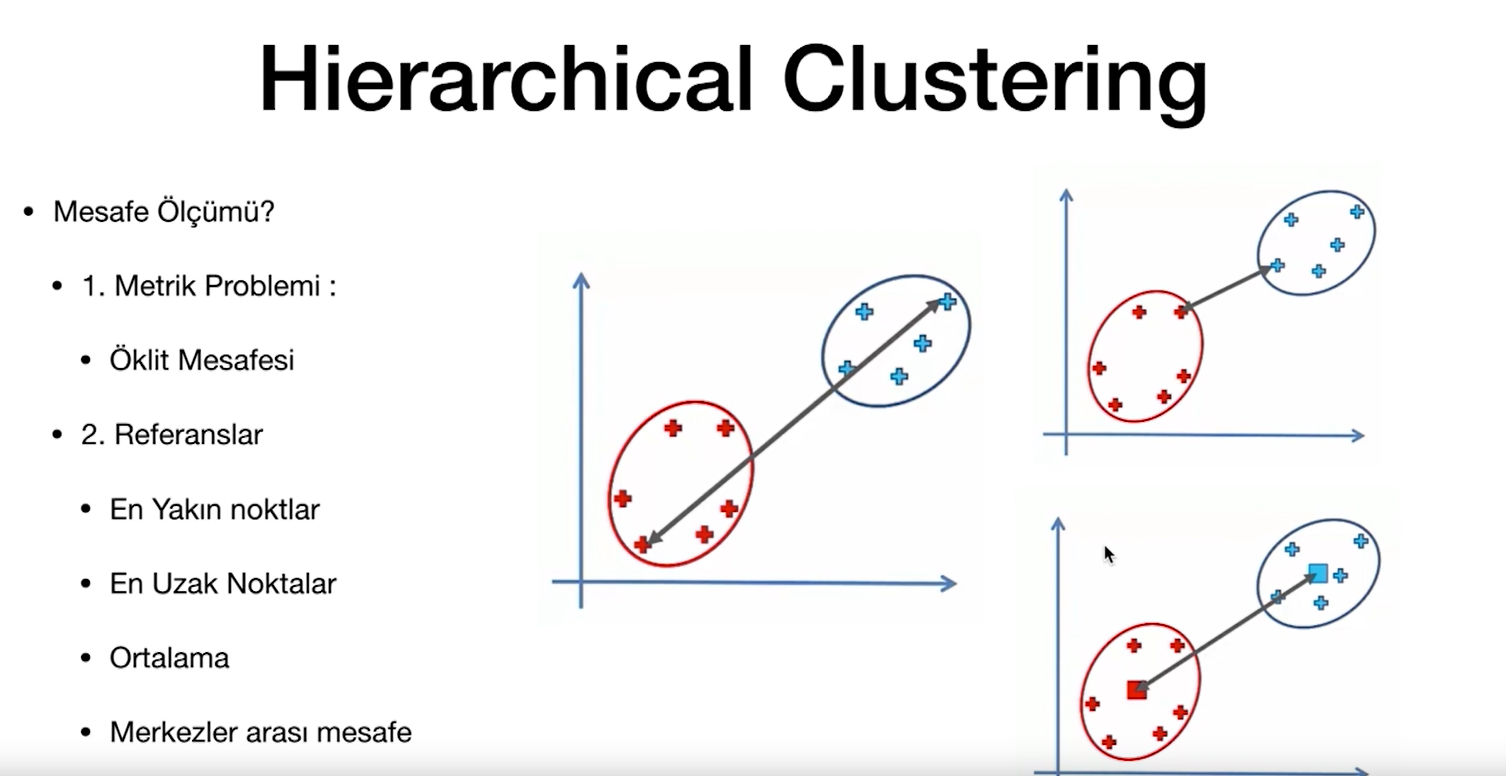
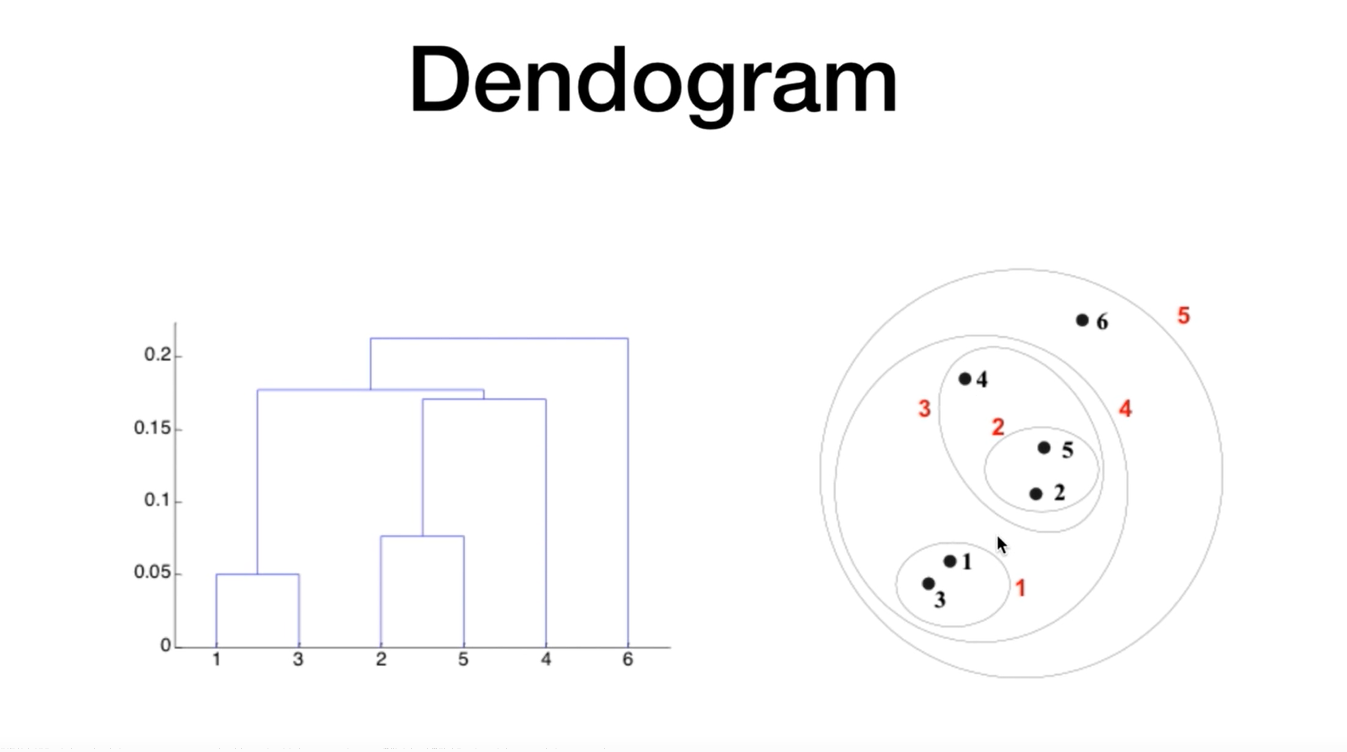
# Dendogram bize kaç cluster istediğimize göre bir kümeleme yapma konusunda ciddi yardımcı olabiliyor
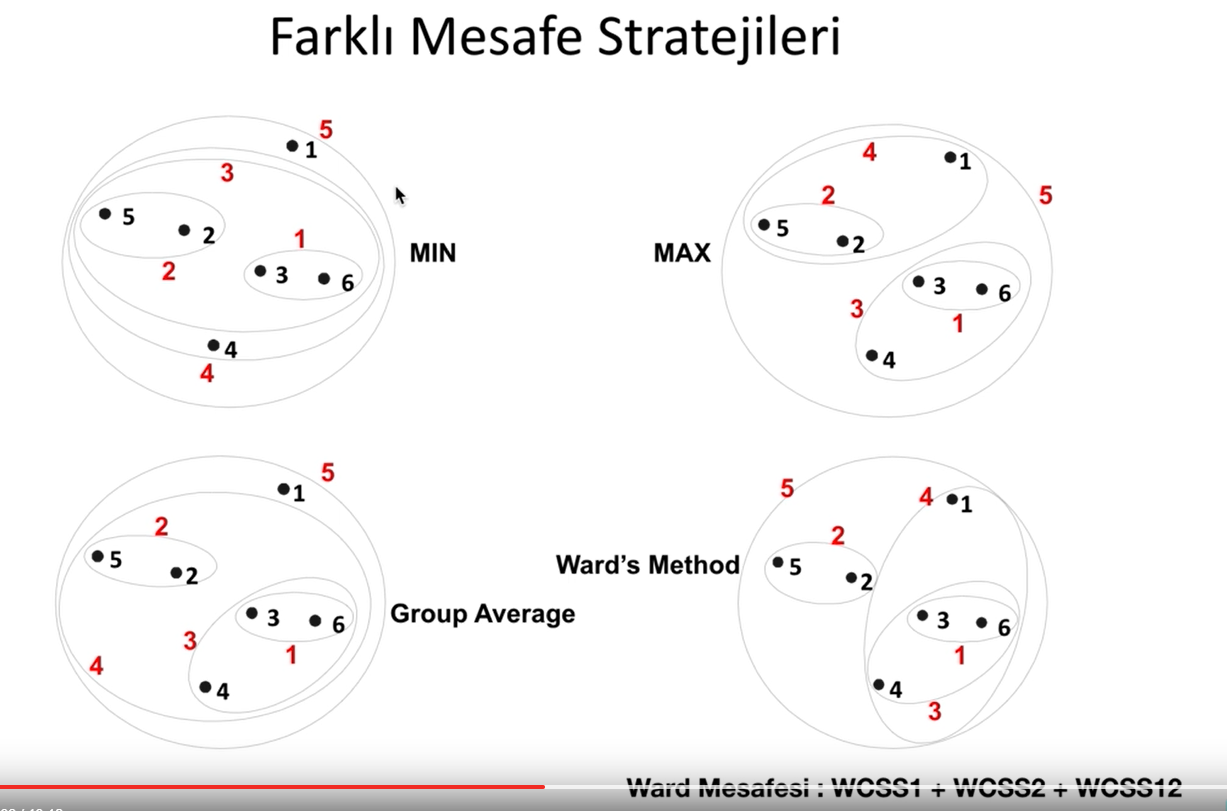
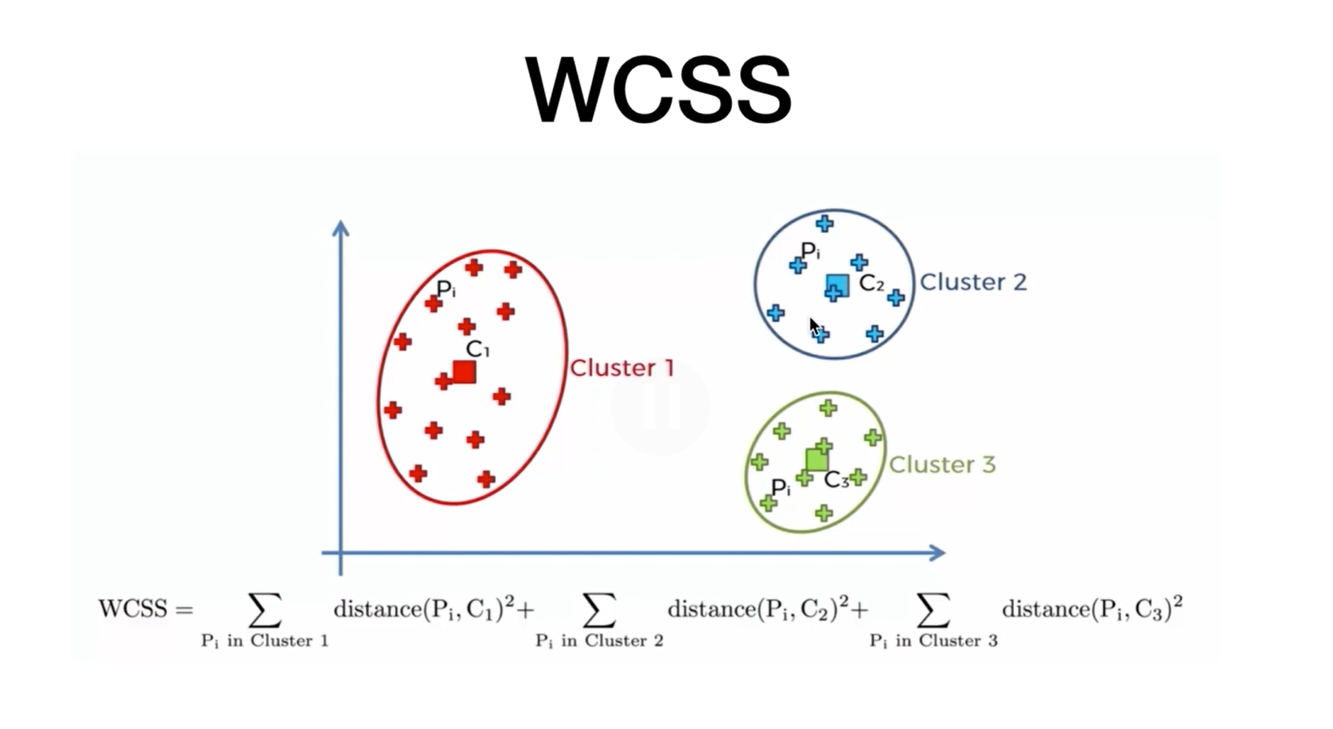

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_pickle('veriler.pkl')

In [3]:
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


### farklı metricler ile farklı Agglomerative Clustering modellerini karşılaştıralım

In [4]:
from sklearn.cluster import AgglomerativeClustering

X = data.iloc[:,3:].values
ac_euclidean = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')


y_pred = ac_euclidean.fit_predict(X)
#print(y_pred)

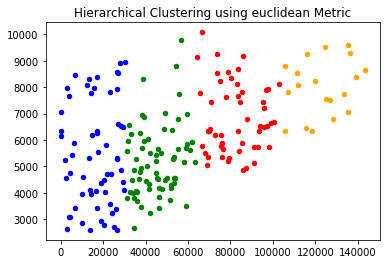

In [5]:
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],s=20,c='red')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],s=20 ,c='green')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],s=20 ,c='blue')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1],s=20 ,c='orange')

plt.title('Hierarchical Clustering using euclidean Metric')
plt.show()

In [6]:
# cosine metriği ile agglomeratice clustering
X = data.iloc[:,3:].values

ac_cosine = AgglomerativeClustering(n_clusters=4,affinity='deprecated',  metric='cosine',linkage='average')

y_pred1 = ac_euclidean.fit_predict(X)
#print(y_pred)

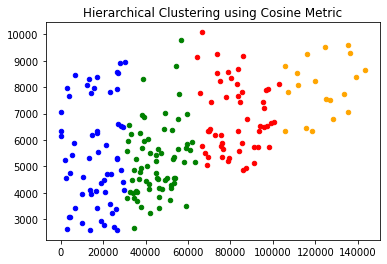

In [7]:
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],s=20,c='red')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],s=20 ,c='green')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],s=20 ,c='blue')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1],s=20 ,c='orange')

plt.title('Hierarchical Clustering using Cosine Metric')
plt.show()

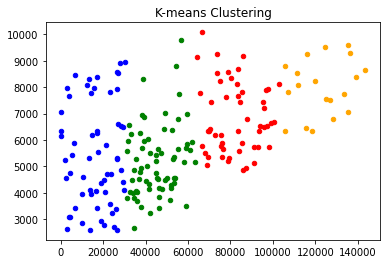

In [8]:
k_means = KMeans(n_clusters=4, init='k-means++', n_init='warn', random_state=42, copy_x=True, algorithm='lloyd')
y_pred1 = k_means.fit_predict(X)

plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],s=20,c='red')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],s=20 ,c='green')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],s=20 ,c='blue')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1],s=20 ,c='orange')

plt.title('K-means Clustering')
plt.show()

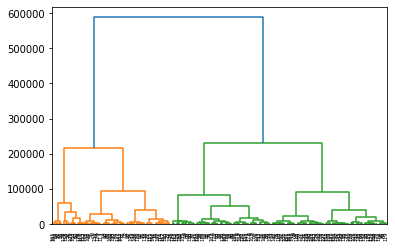

In [9]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()
# k yı 2 veya 4 almak mantıklı görünüyor bu veri için

### Dendrogram öncesi Normalizasyon işlemi yapsaydık neler olurdu acaba 

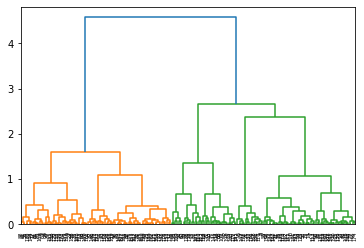

In [10]:
data = pd.read_pickle('veriler.pkl')

X = data.iloc[:,3:].values

minmax = MinMaxScaler()
X = minmax.fit_transform(X)

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.show()
# daha anlaşılır bir şey ile karşılaştımm

### DBScan ile deneyelim

In [29]:
#DBSCAN - Density-Based Spatial Clustering of Applications with Noise

data = pd.read_pickle('veriler.pkl')

X = data.iloc[:,3:].values


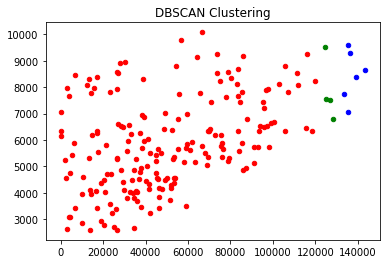

In [30]:
from sklearn.cluster import DBSCAN

dbs  = DBSCAN(eps=5000, min_samples=4, metric='euclidean')
#dbs  = DBSCAN(eps=5000, min_samples=4)

y_pred = dbs.fit_predict(X)

plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1],s=20,c='red')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1],s=20 ,c='green')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1],s=20 ,c='blue')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1],s=20 ,c='orange')


plt.title('DBSCAN Clustering')
plt.show()